In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#import missingno as ms

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.svm import SVC

In [57]:
df=pd.read_csv("D:\HTM\kidney1.csv")

In [58]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [59]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [60]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


<AxesSubplot:>

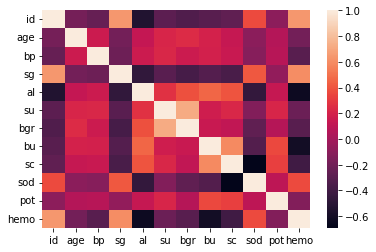

In [61]:
sns.heatmap(df.corr())

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [63]:
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [64]:
df[df['classification']=='ckd\t']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
230,230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,...,NaN,9500,NaN,yes,yes,no,poor,no,no,ckd\t


In [65]:
df.drop(df[df['classification']=='ckd\t'].index,axis=0,inplace=True)

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df.classification.value_counts()

1    140
0    120
Name: classification, dtype: int64

In [88]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,15.4,32,72,1,4,1,0,0,0,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,20,62,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,23,68,0,3,1,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,2,2,0,0,...,12.2,27,72,1,4,1,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,10.8,21,88,1,4,1,0,0,1,0


In [89]:
df['rbc']=le.fit_transform(df['rbc'])
df['pc']=le.fit_transform(df['pc'])
df['pcc']=le.fit_transform(df['pcc'])
df['ba']=le.fit_transform(df['ba'])
df['bgr']=le.fit_transform(df['bgr'])
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,15.4,32,72,1,4,1,0,0,0,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,20,62,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,23,68,0,3,1,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,2,2,0,0,...,12.2,27,72,1,4,1,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,10.8,21,88,1,4,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.7,35,62,0,3,1,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,42,72,0,3,1,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.8,37,61,0,3,1,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.2,39,67,0,3,1,0,0,0,1


In [90]:
df['htn']=le.fit_transform(df['htn'])
df['dm']=le.fit_transform(df['dm'])
df['cad']=le.fit_transform(df['cad'])
df['ane']=le.fit_transform(df['ane'])
df['pe']=le.fit_transform(df['pe'])
df['appet']=le.fit_transform(df['appet'])
df['wc']=le.fit_transform(df['wc'])
df['pcv']=le.fit_transform(df['pcv'])

In [71]:
#ms.matrix(df)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              398 non-null    int64  
 1   age             389 non-null    float64
 2   bp              386 non-null    float64
 3   sg              352 non-null    float64
 4   al              353 non-null    float64
 5   su              350 non-null    float64
 6   rbc             398 non-null    int32  
 7   pc              398 non-null    int32  
 8   pcc             398 non-null    int32  
 9   ba              398 non-null    int32  
 10  bgr             398 non-null    int64  
 11  bu              379 non-null    float64
 12  sc              381 non-null    float64
 13  sod             311 non-null    float64
 14  pot             310 non-null    float64
 15  hemo            347 non-null    float64
 16  pcv             398 non-null    int32  
 17  wc              398 non-null    int

In [73]:
df['bp']=df['bp'].fillna(df['bp'].mode())

In [74]:
df['wc']=df['wc'].fillna(df['wc'].mode())
df['sod']=df['sod'].fillna(df['sod'].mean())
df['pot']=df['pot'].fillna(df['pot'].mean())
df['sg']=df['sg'].fillna(df['sg'].mean())
df['al']=df['al'].fillna(df['al'].mean())
df['su']=df['su'].fillna(df['su'].mean())
df['hemo']=df['hemo'].fillna(df['hemo'].mean())
df['bu']=df['bu'].fillna(df['bu'].mean())
df['sc']=df['sc'].fillna(df['sc'].mean())

In [75]:
#ms.matrix(df)

In [76]:
df.dropna(inplace=True)

In [77]:
df.drop('rc',axis=1,inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,15.4,32,72,1,4,1,0,0,0,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,20,62,1,3,1,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,23,68,0,3,1,0,0,0,ckd
5,5,60.0,90.0,1.015,3.0,0.0,2,2,0,0,...,12.2,27,72,1,4,1,0,1,0,ckd
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,10.8,21,88,1,4,1,0,0,1,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.7,35,62,0,3,1,0,0,0,notckd
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,42,72,0,3,1,0,0,0,notckd
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.8,37,61,0,3,1,0,0,0,notckd
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.2,39,67,0,3,1,0,0,0,notckd


In [78]:
#ms.matrix(df)

In [79]:
df['classification']=le.fit_transform(df['classification'])

In [80]:
df1=['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc']
df2=df[df1]

In [81]:
x_train,x_test,y_train,y_test=train_test_split(df2,df['classification'],test_size=0.25,random_state=11)

In [82]:
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier(criterion='gini')
k=cart.fit(x_train,y_train)
y_pred=k.predict(x_test)
print(x_test)
print(y_test)

        bp        sg        al        su  rbc  pc  pcc
317   70.0  1.020000  0.000000  0.000000    1   1    0
227   80.0  1.015000  0.000000  0.000000    2   1    0
199   80.0  1.015000  0.000000  0.000000    2   1    0
77    70.0  1.010000  1.000000  0.000000    2   1    0
214   80.0  1.015000  0.000000  0.000000    2   0    0
..     ...       ...       ...       ...  ...  ..  ...
252   80.0  1.025000  0.000000  0.000000    1   1    0
98   140.0  1.017429  1.014164  0.451429    2   2    0
375   80.0  1.020000  0.000000  0.000000    1   1    0
49    70.0  1.010000  2.000000  0.000000    1   0    1
115   80.0  1.010000  0.000000  0.000000    2   0    0

[65 rows x 7 columns]
317    1
227    0
199    0
77     0
214    0
      ..
252    1
98     0
375    1
49     0
115    0
Name: classification, Length: 65, dtype: int32


In [83]:
from sklearn.metrics import accuracy_score
er=accuracy_score(y_test,y_pred)
print(er)

0.9692307692307692


C:\Users\N YASWANTH KUMAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


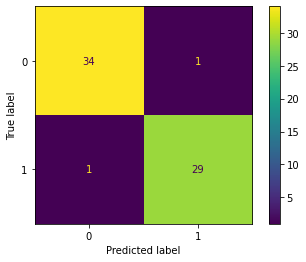

In [84]:
from sklearn import metrics
metrics.plot_confusion_matrix(k,x_test,y_test)

In [85]:
import pickle
pickle.dump(cart,open('kidney final.pkl','wb'))